In [92]:
#statistical
import pandas as pd
import numpy as np

#dataset
from sklearn.datasets import *

#mchine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

#graphing and display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
%matplotlib inline

In [93]:
def create_dataset(bunch):
    df = pd.DataFrame(bunch.data, columns = bunch.feature_names)
    if len(bunch.target.shape) > 1:
        for i, target in enumerate(bunch.target_names):
            df[target] = bunch.target[:, i]
    else:
        df['target'] = bunch.target
    return df

In [94]:
iris = load_iris()
boston_housing = load_boston()
diabetes = load_diabetes()
linnerud = load_linnerud()
wine = load_wine()
breast_cancer = load_breast_cancer()

In [95]:
datasets = {}
for name, bunch in zip(['diabetes', 'wine', 'linnerud', 'breast_cancer', 'boston_housing', 'iris'],
                       [diabetes, wine, linnerud, breast_cancer, boston_housing, iris]):
    datasets[name] = create_dataset(bunch)

In [96]:
datasets['breast_cancer'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [97]:
for key, dataframe in datasets.items():
    print(key, dataframe.shape)

diabetes (442, 11)
wine (178, 14)
linnerud (20, 6)
breast_cancer (569, 31)
boston_housing (506, 14)
iris (150, 5)


# Draw Learning Curves

In [98]:
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(),
                                                        datasets['breast_cancer'].drop('target', axis = 1),
                                                        datasets['breast_cancer'].target,
                                                        train_sizes = np.arange(0.1, 1, 0.1))

In [99]:
learning_curve_res = pd.DataFrame(columns = range(train_scores.shape[1]))
for result, result_type in zip([train_scores, test_scores], ['train', 'test']):
    frame = pd.DataFrame(result)
    frame['size'] = train_sizes
    frame['type'] = result_type
    learning_curve_res = learning_curve_res.append(frame, ignore_index = True)

C:\Users\rossr\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [100]:
learning_curve_res.head()

,0,1,2,size,type
0,1.000000,1.000000,1.000000,37.0,train
1,0.973333,0.973333,0.973333,75.0,train
2,0.964602,0.938053,0.938053,113.0,train
3,0.966887,0.913907,0.927152,151.0,train
4,0.957672,0.931217,0.931217,189.0,train


In [101]:
learning_curve_res = learning_curve_res.melt(id_vars = ['size', 'type'], var_name = 'cv_fit', value_name = 'score')

In [102]:
learning_curve_res.head()

,size,type,cv_fit,score
0,37.0,train,0,1.000000
1,75.0,train,0,0.973333
2,113.0,train,0,0.964602
3,151.0,train,0,0.966887
4,189.0,train,0,0.957672


C:\Users\rossr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


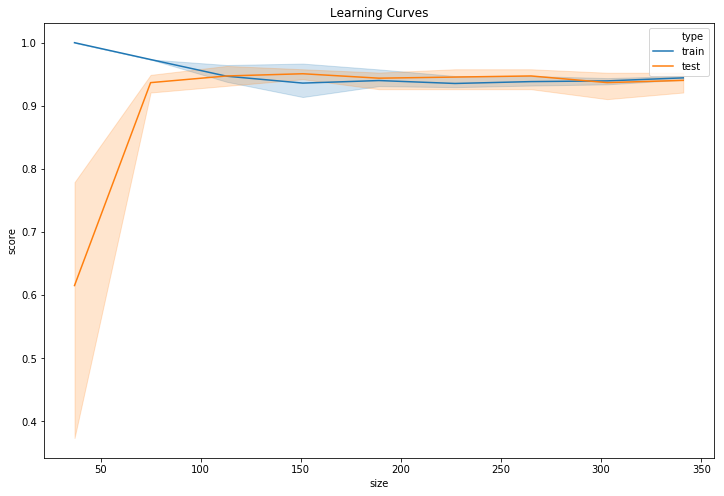

In [103]:
fig = plt.figure(figsize = (12, 8))
plt.title('Learning Curves')
sns.lineplot(x = 'size', y = 'score', hue = 'type', data = learning_curve_res)

# Pipeline Several Objects

In [104]:
pipeline = Pipeline(steps = [('scaling', StandardScaler()), ('naive_bayes', LogisticRegression())])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(datasets['iris'].drop('target', axis = 1),
                                                    datasets['iris'].target,
                                                    random_state = 42,
                                                    test_size = 0.3)

In [106]:
model = LogisticRegression()
'{:.2%}'.format(model.fit(X_train, y_train).score(X_test, y_test))

'97.78%'

In [107]:
'{:.2%}'.format(pipeline.fit(X_train, y_train).score(X_test, y_test))

'91.11%'

# Prepare Scoring Report

# Optimize a Model Using Grid Search